In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
!pip install joypy
import joypy
from joypy import joyplot

!pip install squarify
import squarify
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df=pd.read_csv("/content/summer-products-with-rating-and-performance_2020-08 (1).csv")
categories_count=pd.read_csv("/content/unique-categories.sorted-by-count.csv%3FX-Goog-Algorithm=GOOG4-RSA-SHA256&X-Goog-Credential=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com%2F20230616%2Fauto%2Fstorage%2Fgoog4_request&X-Goog-Date=20230616T091417Z&X-Goog-Expires=259200&.csv")

In [3]:
df.head()


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
df.describe(include=object)

,title,title_orig,currency_buyer,tags,product_color,product_variation_size_id,shipping_option_name,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_id,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
count,1573,1573,1573,1573,1532,1559,1573,473,1556,1573,1569,1572,1573,226,1573,1573,1573,1573,1573
unique,1201,1203,1,1230,101,106,15,2,6,958,957,1058,958,125,1341,1341,1341,1,1
top,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,EUR,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,S,Livraison standard,Quantité limitée !,CN,guangzhouweishiweifushiyouxiangongsi,广州唯适唯服饰有限公司,"83 % avis positifs (32,168 notes)",558c2cdc89d53c4005ea2920,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5e16cb87e6dd7c03be24b28a,https://contestimg.wish.com/api/webimage/5e16c...,5e16cb87e6dd7c03be24b28a,summer,2020-08
freq,24,24,1573,17,302,641,1508,472,1516,15,15,14,15,12,3,3,3,1573,1573


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [6]:
df.isnull().sum()


title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [7]:
categories_count.head(10)

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual
5,636,Plus Size
6,580,sleeveless
7,549,Dress
8,540,Shorts
9,507,Tops


In [8]:
df.drop(columns=['title','currency_buyer','badges_count','urgency_text','merchant_info_subtitle', 'merchant_profile_picture', 'product_url',
'product_picture', 'product_id', 'theme', 'crawl_month'],axis=1,inplace=True)


In [9]:
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,...,34,50,1.0,CN,zgrdejia,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,41,50,1.0,CN,SaraHouse,sarahouse,17752,3.899673,56458aa03a698c35c9050988,0
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,...,36,50,1.0,CN,hxt520,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,...,41,50,NaN,CN,allenfan,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,...,35,50,1.0,CN,youngpeopleshop,happyhorses,14482,4.001588,5ab3b592c3911a095ad5dadb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,...,41,50,NaN,CN,cxuelin99126,cxuelin99126,5316,4.224605,5b507899ab577736508a0782,0
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,...,26,50,1.0,CN,sell best quality goods,sellbestqualitygoods,4435,3.696054,54d83b6b6b8a771e478558de,0
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,...,11,50,NaN,CN,shixueying,shixueying,210,3.961905,5b42da1bf64320209fc8da69,0
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,...,29,50,NaN,CN,modai,modai,31,3.774194,5d56b32c40defd78043d5af9,0


In [10]:
df.drop(columns=['merchant_has_profile_picture'],axis=1, inplace=True)

In [11]:
df.isnull().sum()

title_orig                        0
price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
rating_five_count                45
rating_four_count                45
rating_three_count               45
rating_two_count                 45
rating_one_count                 45
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    41
product_variation_size_id        14
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner             1100
origin_country                   17
merchant_title                    0
merchant_name               

In [12]:
df.drop(columns=['has_urgency_banner','merchant_name'],axis=1,inplace=True)


In [13]:
df['product_variation_size_id']=df['product_variation_size_id'].fillna(df['product_variation_size_id'].mode()[0])


In [14]:
df['product_variation_size_id'].isnull().sum()


0

In [16]:
null_columns = ["rating_five_count", "rating_four_count", "rating_three_count", "rating_two_count",
                "rating_one_count"]

for column in null_columns:
    df[column] = df[column].fillna(df[column].mean())

df.isnull().sum()

title_orig                      0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                  41
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                 17
merchant_title                  0
merchant_rating_count           0
merchant_rating                 0
merchant_id                     0
dtype: int64

In [17]:
df['product_variation_inventory']

0       50
1       50
2        1
3       50
4        1
        ..
1568    50
1569     2
1570    15
1571    36
1572    50
Name: product_variation_inventory, Length: 1573, dtype: int64

In [18]:
df['product_variation_size_id'].unique()



array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size-XXS', 'W

In [19]:
df['product_variation_size_id'] = df['product_variation_size_id'].apply(lambda x: x.upper())
size_list = list(df['product_variation_size_id'])

In [20]:
size_list

['M',
 'XS',
 'XS',
 'M',
 'S',
 'SIZE-XS',
 'XS',
 'M.',
 'M',
 'S',
 'XXS',
 'XS',
 'XS',
 'S',
 'S',
 'S',
 'L',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'M',
 'XXS',
 'M',
 'M',
 'S',
 'XS',
 'XXL',
 'S',
 'XXS',
 'S',
 'M',
 'S',
 'S',
 'S',
 'XXS',
 'XS',
 'S',
 'L',
 'S',
 'S',
 'XS',
 'S',
 'S',
 'S.',
 'S',
 'S',
 'S',
 'S',
 'XXS',
 'XXS',
 'S',
 'L',
 'CHOOSE A SIZE',
 'XXS',
 'S',
 'XS',
 'M',
 'XS',
 'XS',
 'S',
 'S',
 'M',
 'XS',
 'M',
 'XXS',
 'M',
 'XS',
 'S',
 'M',
 'M',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'XS.',
 'S',
 'M',
 'M',
 'S',
 'XS',
 'S',
 'L',
 'S',
 'S',
 'XS',
 'M',
 'XS',
 'XS',
 'XS',
 'XS',
 'S',
 '32/L',
 'S.',
 'L',
 'SUIT-S',
 'S',
 'S',
 'XXS',
 'S',
 'S',
 'XS',
 'XS',
 'XS',
 'XXXXXL',
 'XS',
 'XXS',
 'S',
 'XS',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'M',
 'M',
 'S',
 'XS',
 'L',
 'XXS',
 'XS',
 'XS',
 'S',
 'XS',
 'S',
 'XS',
 'L',
 'EU 35',
 'S',
 'S',
 '4',
 'M',
 'S',
 'M',
 'S',
 'L',
 'S',
 'S',
 'S',
 'S',
 'S',
 'XS',


In [21]:
xxs_err = []
xs_err = []
s_err = []
m_err = []
l_err = []
xl_err = []
xxl_err = []

In [22]:
for i in size_list:
    if (i == 'XXS') or (i == 'XXXS') or (i == 'SIZE XXS') or (i == 'SIZE-XXS') or (i == 'SIZE -XXS'):
        xxs_err.append(i)
    elif (i == 'XS') or (i == 'XS.') or (i == 'SIZE XS') or (i == 'SIZE-XS'):
        xs_err.append(i)
    elif (i == 'S') or (i == 'S.') or (i == 'SUIT-S') or (i == 'SIZE S.') or (i == 'SIZE S') or (i == 'S..') \
    or (i == 'S(BUST 88CM)') or (i == 'S (WAIST58-62CM)') or (i == 'SIZE-S') or (i == 'S DIAMETER 30CM') or (i == '25-S') \
    or (i == 'SIZE/S') or (i == 'PANTS-S') or (i == 'SIZE--S'):
        s_err.append(i)
    elif (i == 'M') or (i == 'M.') or (i == 'SIZE M'):
        m_err.append(i)
    elif (i == 'L') or (i == '32/L') or (i == 'L.') or (i == 'SIZEL'):
        l_err.append(i)
    elif (i == 'XL') or (i == 'X   L'):
        xl_err.append(i)
    elif (i == 'XXL') or (i == 'XXXXXL') or (i == '3XL') or (i == 'SIZE-4XL') or (i == 'XXXL') or (i == '5XL') \
    or (i == '2XL') or (i == '4XL') or (i == 'XXXXL') or (i == '6XL') or (i == 'SIZE-5XL') or (i == 'SIZE4XL') \
    or (i == '04-3XL') or (i == '1 PC - XL'):
        xxl_err.append(i)

def size(type):
    if type in xxs_err:
        return 'XXS'
    elif type in xs_err:
        return 'XS'
    elif type in s_err:
        return 'S'
    elif type in m_err:
        return 'M'
    elif type in l_err:
        return 'L'
    elif type in xl_err:
        return 'XL'
    elif type in xxl_err:
        return 'XXL'
    else:
        return 'OTHER'

df['product_variation_size_id'] = df['product_variation_size_id'].apply(size)

In [23]:
df['product_variation_size_id'].unique()


array(['M', 'XS', 'S', 'XXS', 'L', 'XXL', 'OTHER', 'XL'], dtype=object)

In [24]:
df['product_variation_size_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1573 entries, 0 to 1572
Series name: product_variation_size_id
Non-Null Count  Dtype 
--------------  ----- 
1573 non-null   object
dtypes: object(1)
memory usage: 12.4+ KB


In [25]:
df['product_variation_size_id'].value_counts()


S        702
XS       369
M        206
XXS      113
OTHER     71
L         54
XXL       40
XL        18
Name: product_variation_size_id, dtype: int64

In [26]:
df['product_color'] = df['product_color'].astype(str)
df['product_color'] = df['product_color'].apply(lambda x: x.title())
color_list = list(df['product_color'])

red_un = []
green_un = []
white_un = []
black_un = []
blue_un = []
yellow_un = []
grey_un = []
purple_un = []

for i in color_list:
    if 'Red' in i:
        red_un.append(i)
    elif ('Green' in i) and (i != 'White & Green') and (i != 'Black & Green'):
        green_un.append(i)
    elif (i == 'White') or (i == 'Whiteflora') or (i == 'Offwhite') or (i == 'Whitestripe'):
        white_un.append(i)
    elif (i == 'Black') or (i == 'Coolblack') or (i == 'Offblack'):
        black_un.append(i)
    elif ('Blue' in i) and (i != 'Navyblue & White') and (i != 'Black & Blue') and (i != 'Blue & Pink') \
    and (i != 'Pink & Blue'):
        blue_un.append(i)
    elif (i == 'Yellow') or (i == 'Lightyellow'):
        yellow_un.append(i)
    elif (i == 'Grey') or (i == 'Greysnakeskinprint') or (i == 'Lightgrey') or (i == 'Gray') or (i == 'Lightgray'):
        grey_un.append(i)
    elif 'Purple' in i:
        purple_un.append(i)

def color(type):
    if type in red_un:
        return 'Red'
    elif type in green_un:
        return 'Green'
    elif type in white_un:
        return 'White'
    elif type in black_un:
        return 'Black'
    elif type in blue_un:
        return 'Blue'
    elif type in yellow_un:
        return 'Yellow'
    elif type in grey_un:
        return 'Gray'
    elif type in purple_un:
        return 'Purple'
    else:
        return 'Other'

df['product_color'] = df['product_color'].apply(color)

In [27]:
df['product_color'].unique()

array(['White', 'Green', 'Other', 'Black', 'Yellow', 'Blue', 'Gray',
       'Red', 'Purple'], dtype=object)

In [33]:
df['product_color'].value_counts()


Other     464
Black     308
White     259
Yellow    107
Blue      102
Red       101
Green      94
Gray       85
Purple     53
Name: product_color, dtype: int64

In [29]:
from os import W_OK
df['title_orig'] = df['title_orig'].astype(str)
df['title_orig'] = df['title_orig'].apply(lambda x: x.title())
title_list = list(df['title_orig'])

Men = []
Women = []
Kids = []

for i in title_list:
    if 'Men' in i:
        Men.append(i)
    elif 'Women' in i:
        Women.append(i)
    elif 'Kids' in i:
        Kids.append(i)
    else:
        continue

def title(type):
    if type in Men:
        return 'Men'
    elif type in Women:
        return 'Women'
    elif type in Kids:
        return 'Kids'
    else:
        return 'Other'

df['title'] = df['title_orig'].apply(title)


In [30]:
df['title'].unique()
df['title'].value_counts()


Women    1342
Other     135
Men        88
Kids        8
Name: title, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title_orig                   1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   units_sold                   1573 non-null   int64  
 4   uses_ad_boosts               1573 non-null   int64  
 5   rating                       1573 non-null   float64
 6   rating_count                 1573 non-null   int64  
 7   rating_five_count            1573 non-null   float64
 8   rating_four_count            1573 non-null   float64
 9   rating_three_count           1573 non-null   float64
 10  rating_two_count             1573 non-null   float64
 11  rating_one_count             1573 non-null   float64
 12  badge_local_product          1573 non-null   int64  
 13  badge_product_qual

In [35]:
df.isnull().sum()

title_orig                      0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                 17
merchant_title                  0
merchant_rating_count           0
merchant_rating                 0
merchant_id                     0
title         

In [38]:
df['origin_country']=df['origin_country'].fillna(df['origin_country'].mode()[0])

In [39]:
df.isnull().sum()

title_orig                     0
price                          0
retail_price                   0
units_sold                     0
uses_ad_boosts                 0
rating                         0
rating_count                   0
rating_five_count              0
rating_four_count              0
rating_three_count             0
rating_two_count               0
rating_one_count               0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
tags                           0
product_color                  0
product_variation_size_id      0
product_variation_inventory    0
shipping_option_name           0
shipping_option_price          0
shipping_is_express            0
countries_shipped_to           0
inventory_total                0
origin_country                 0
merchant_title                 0
merchant_rating_count          0
merchant_rating                0
merchant_id                    0
title                          0
dtype: int

In [40]:
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_id,title
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,...,4,0,34,50,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,Women
1,Women'S Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,2,0,41,50,CN,SaraHouse,17752,3.899673,56458aa03a698c35c9050988,Women
2,2020 New Arrival Women Spring And Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,...,3,0,36,50,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,Women
3,Hot Summer Cool T Shirt For Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,...,2,0,41,50,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,Women
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,...,1,0,35,50,CN,youngpeopleshop,14482,4.001588,5ab3b592c3911a095ad5dadb,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,...,2,0,41,50,CN,cxuelin99126,5316,4.224605,5b507899ab577736508a0782,Women
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,...,1,0,26,50,CN,sell best quality goods,4435,3.696054,54d83b6b6b8a771e478558de,Women
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,...,2,0,11,50,CN,shixueying,210,3.961905,5b42da1bf64320209fc8da69,Men
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,...,3,0,29,50,CN,modai,31,3.774194,5d56b32c40defd78043d5af9,Women


In [41]:
####A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else)
df['badge_local_product'].unique()


array([0, 1])

In [42]:
#### Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge
df['badge_product_quality'].unique()

array([0, 1])

In [43]:
##### Badge awarded when this product's order is consistently shipped rapidly
df['badge_fast_shipping'].unique()

array([0, 1])

In [44]:
df['shipping_option_name'].unique()

array(['Livraison standard', 'Envio Padrão', 'Standart Gönderi',
       'Standardversand', 'Envío normal', 'Standardowa wysyłka',
       'الشحن القياسي', 'Expediere Standard', 'การส่งสินค้ามาตรฐาน',
       'Standard Shipping', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Livraison Express', 'Стандартная доставка', 'Spedizione standard',
       'Ekspresowa wysyłka'], dtype=object)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'retail_price'}>,
        <Axes: title={'center': 'units_sold'}>,
        <Axes: title={'center': 'uses_ad_boosts'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'rating_count'}>,
        <Axes: title={'center': 'rating_five_count'}>,
        <Axes: title={'center': 'rating_four_count'}>,
        <Axes: title={'center': 'rating_three_count'}>,
        <Axes: title={'center': 'rating_two_count'}>],
       [<Axes: title={'center': 'rating_one_count'}>,
        <Axes: title={'center': 'badge_local_product'}>,
        <Axes: title={'center': 'badge_product_quality'}>,
        <Axes: title={'center': 'badge_fast_shipping'}>,
        <Axes: title={'center': 'product_variation_inventory'}>],
       [<Axes: title={'center': 'shipping_option_price'}>,
        <Axes: title={'center': 'shipping_is_express'}>,
        <Axes: title={'center': 'countries_shipped_to'}>,
        <Axes: title={'c

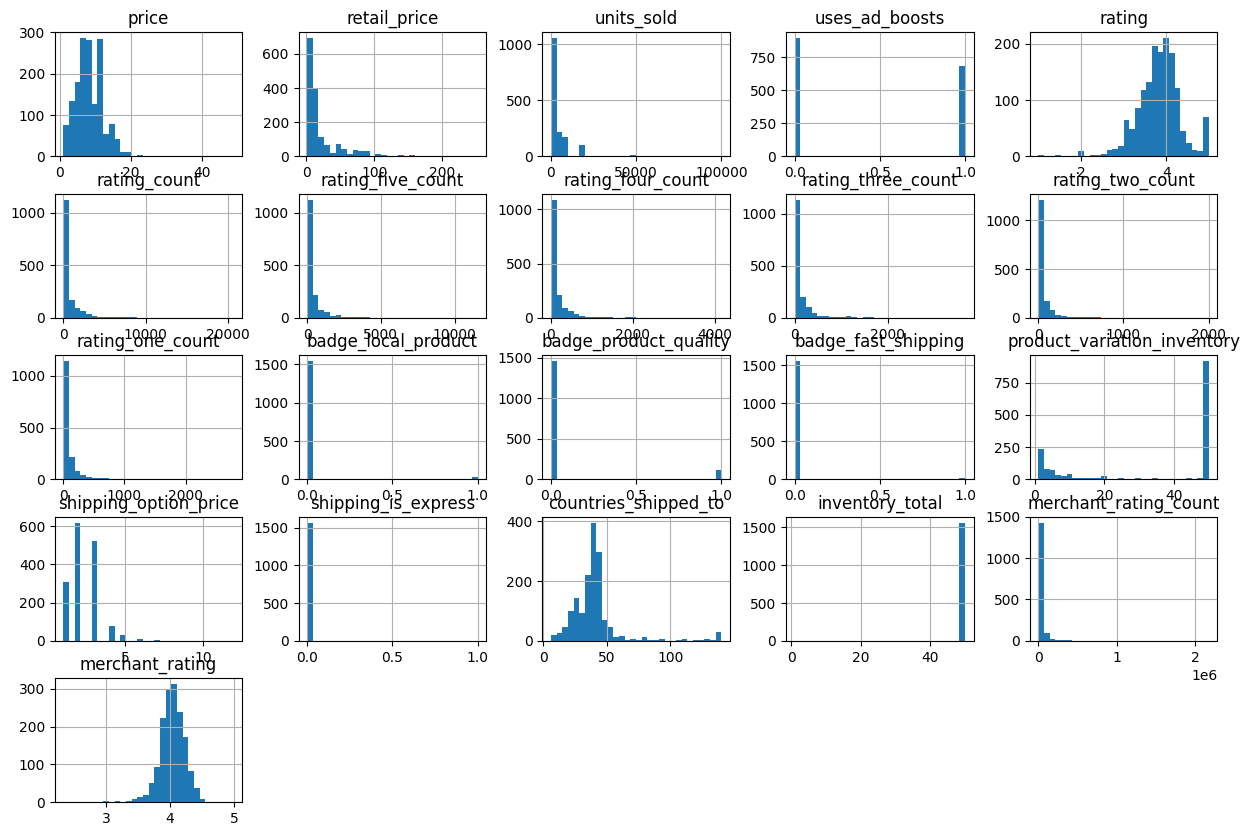

In [45]:
df.hist(bins=30, figsize=(15, 10))

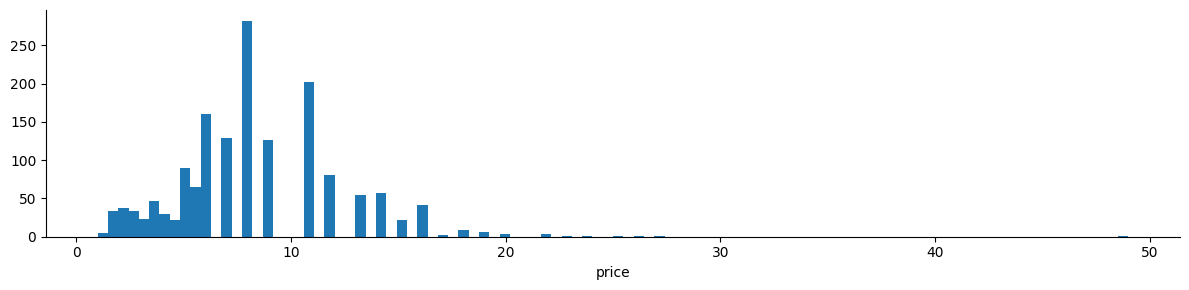

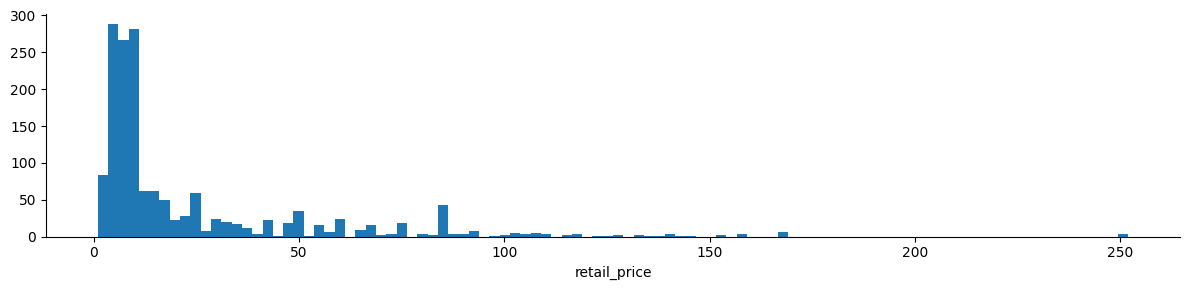

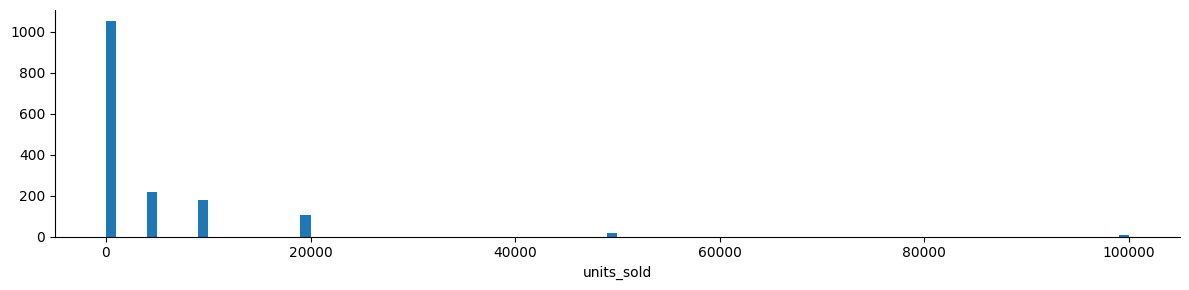

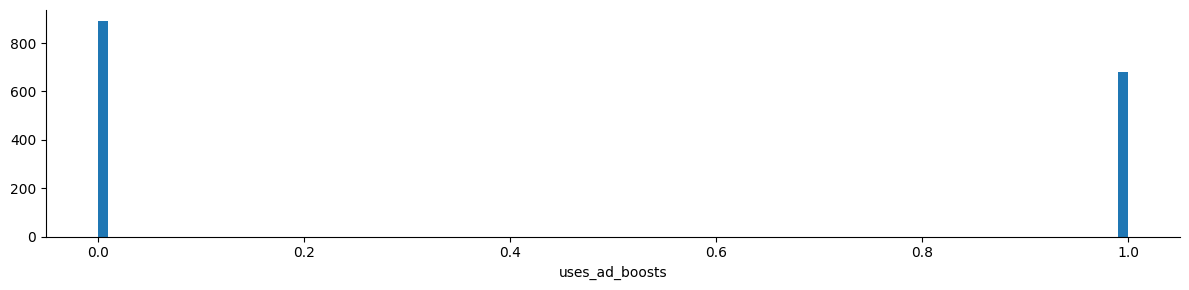

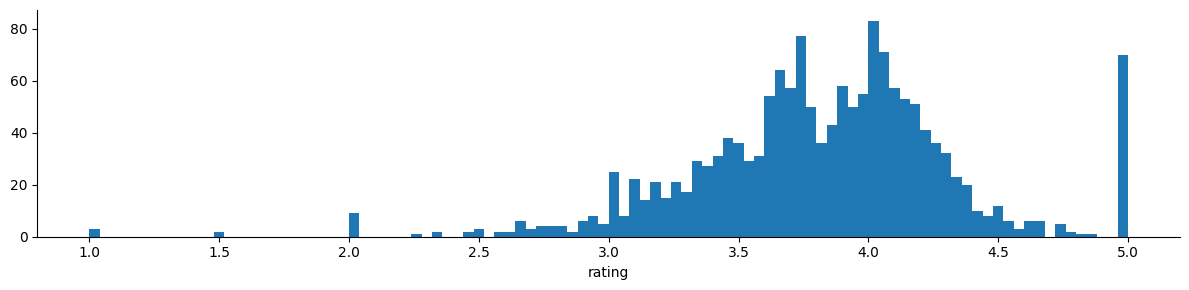

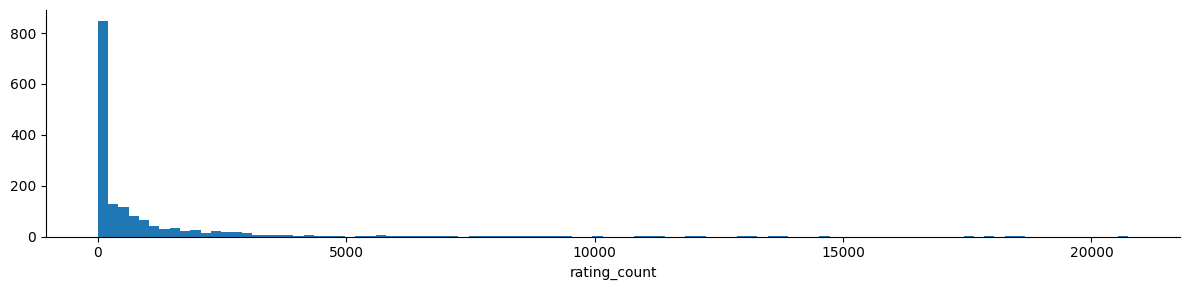

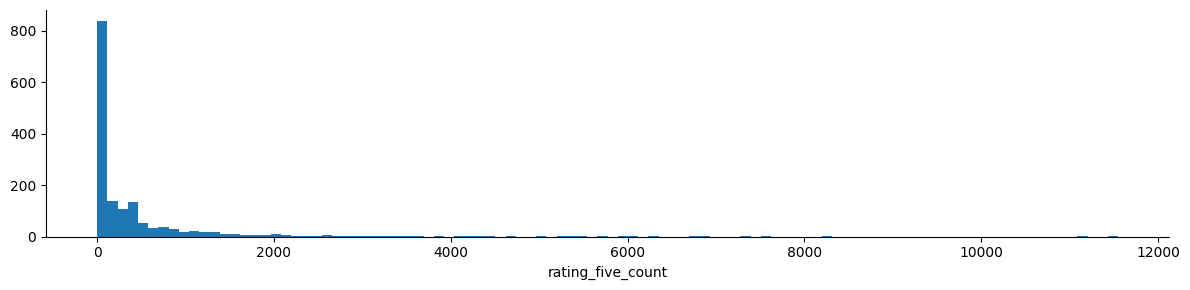

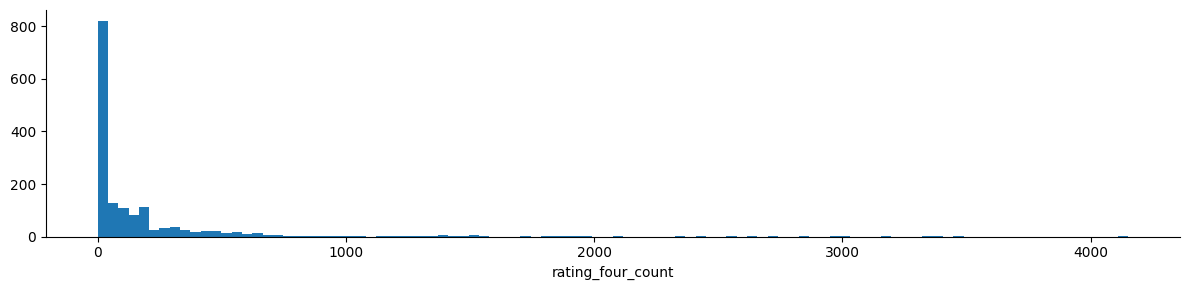

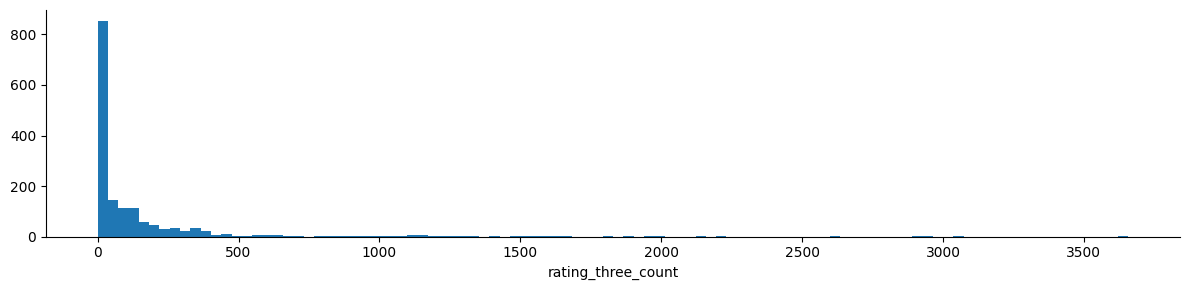

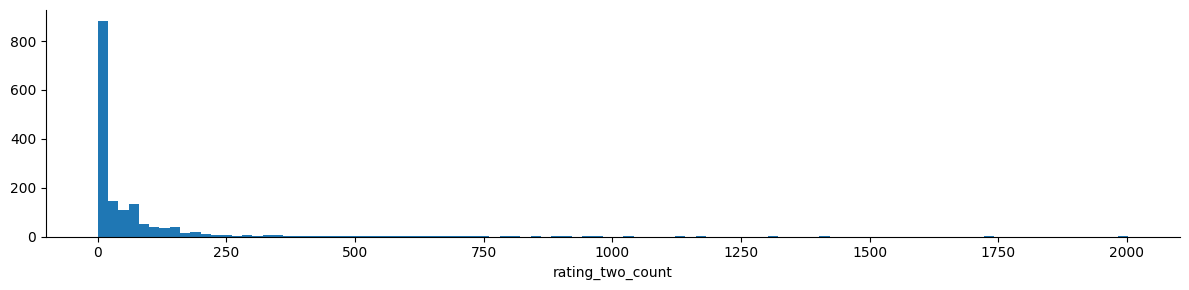

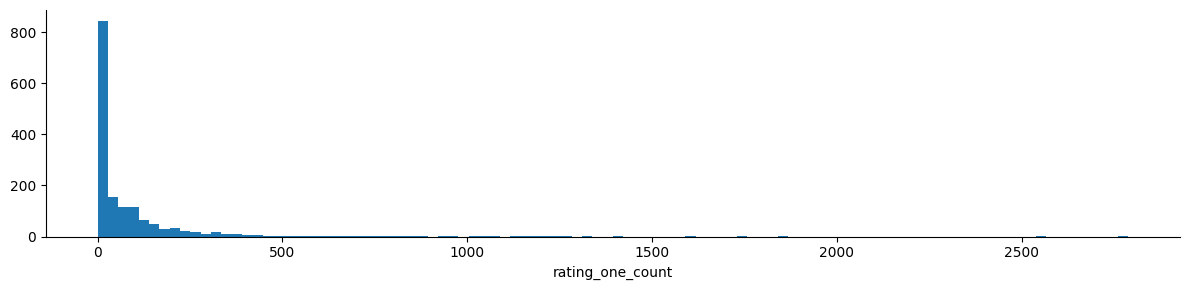

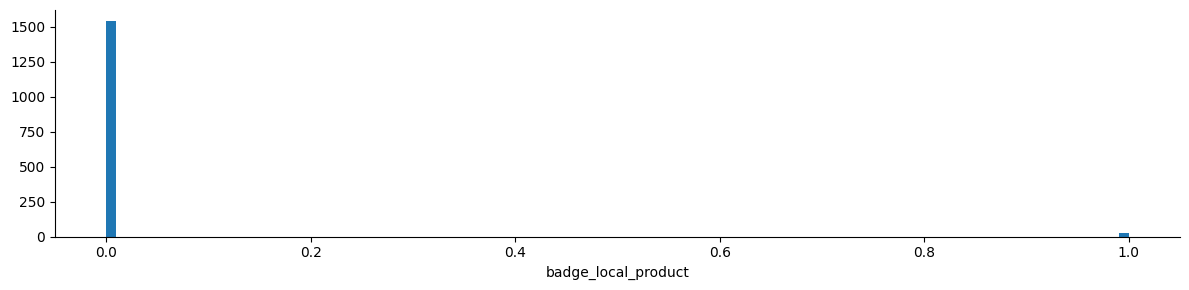

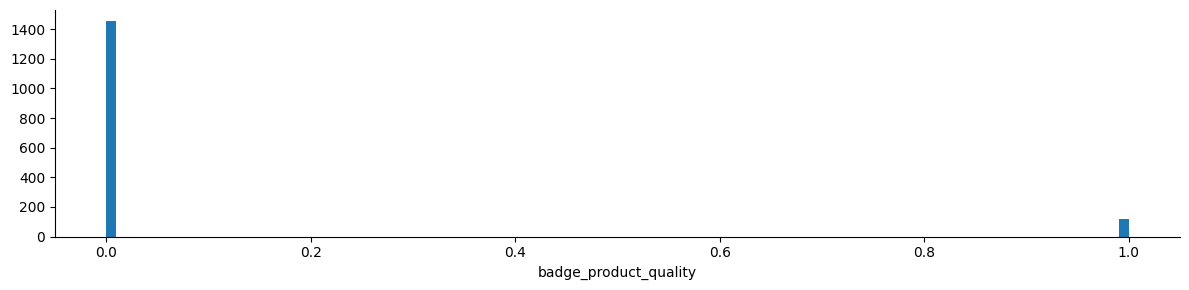

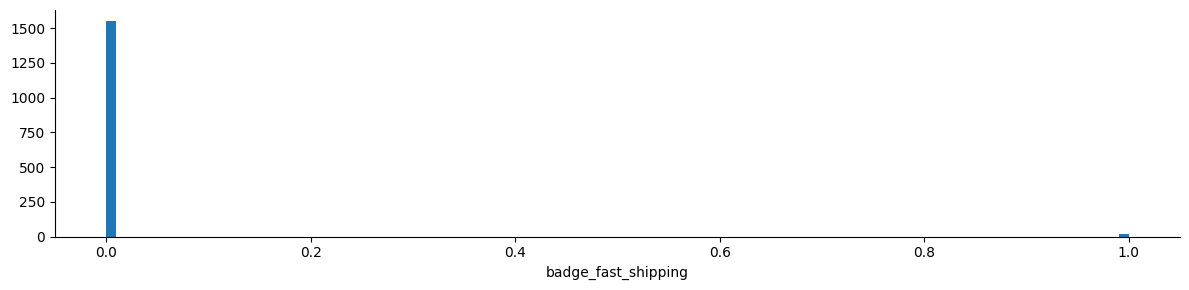

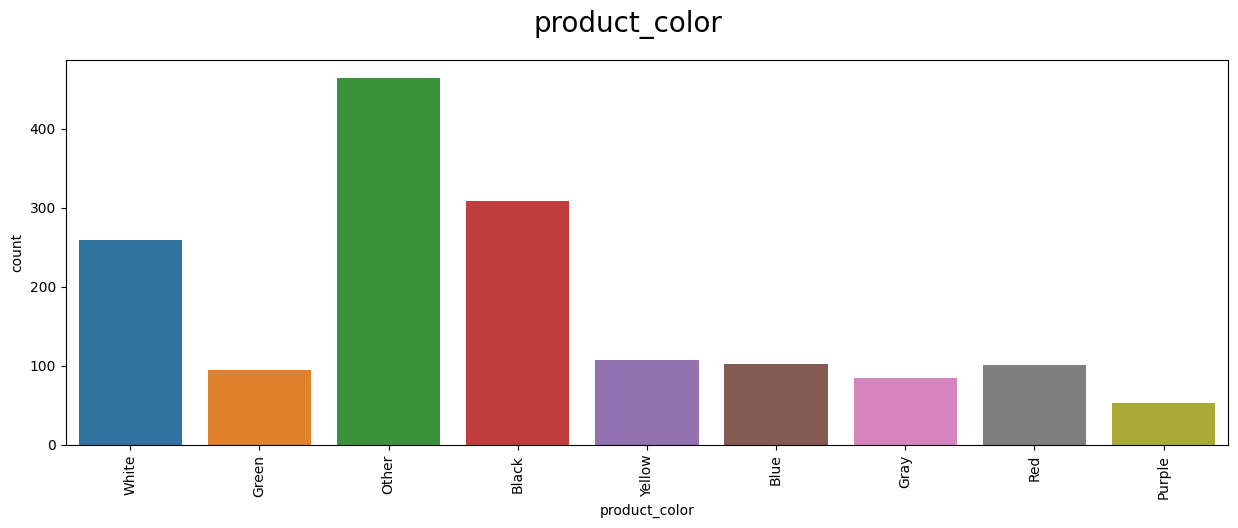

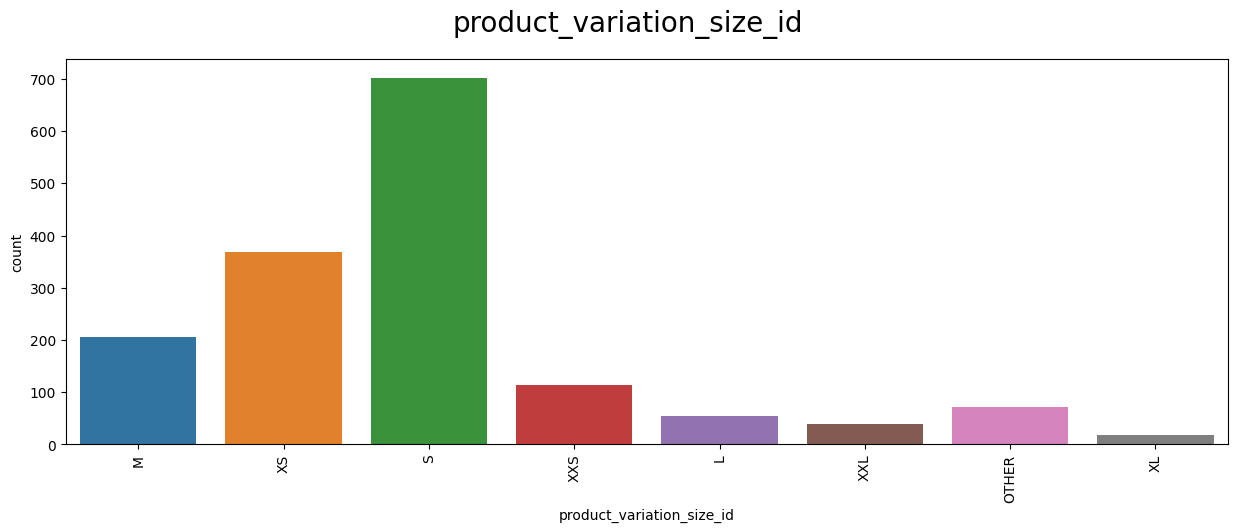

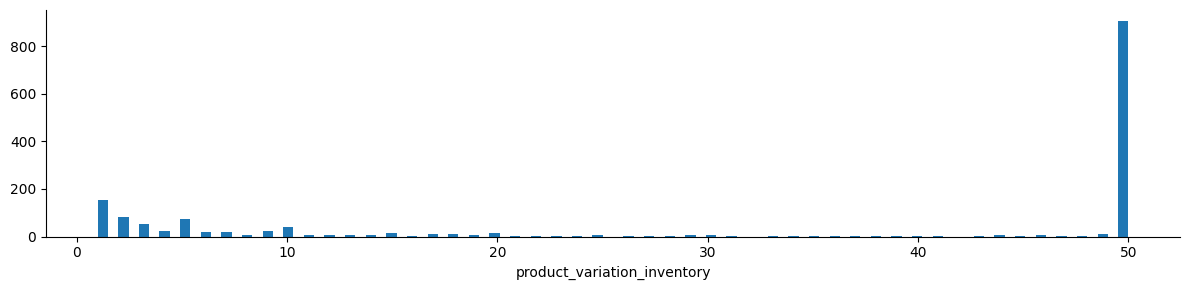

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

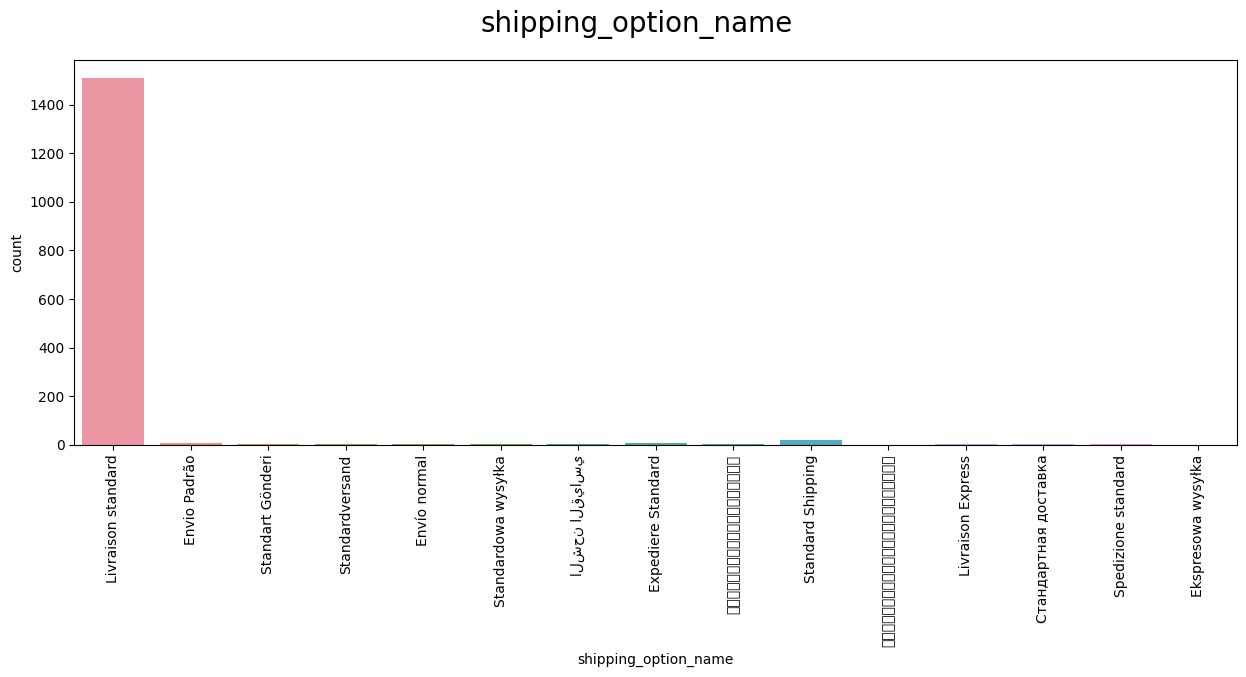

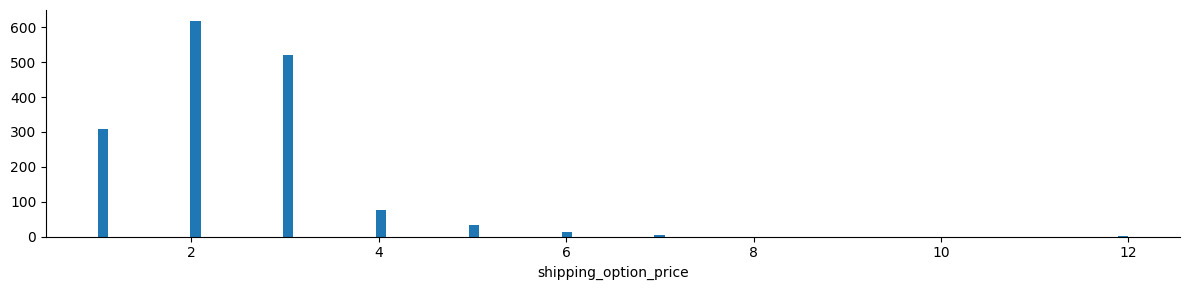

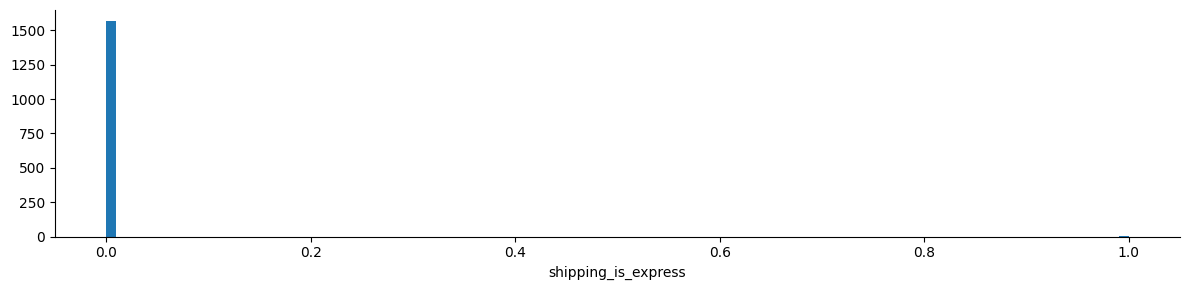

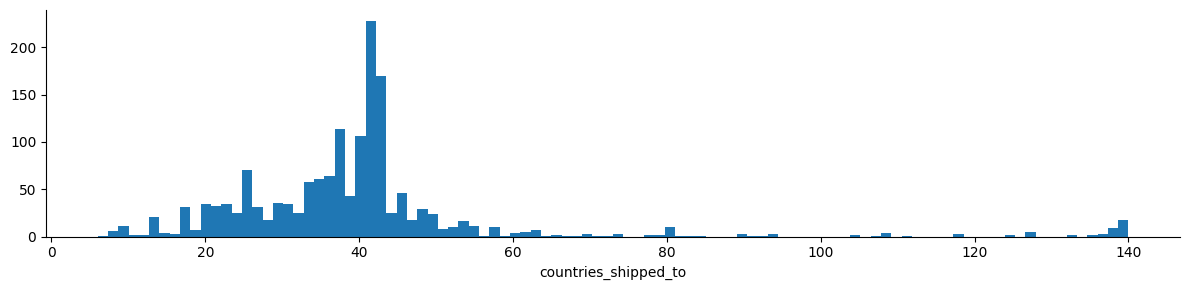

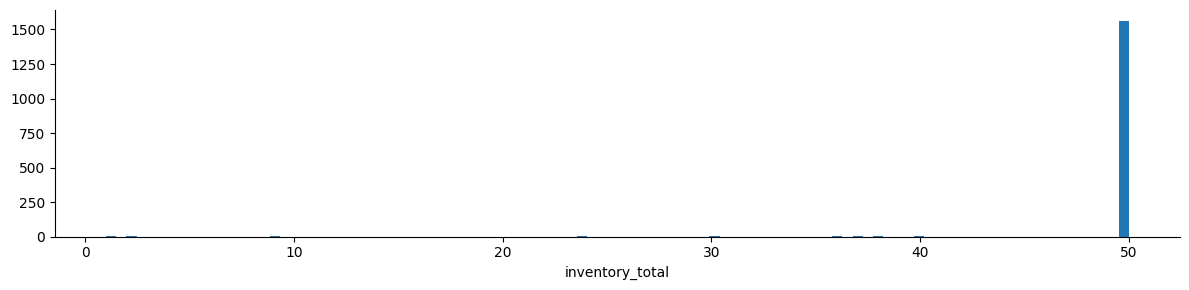

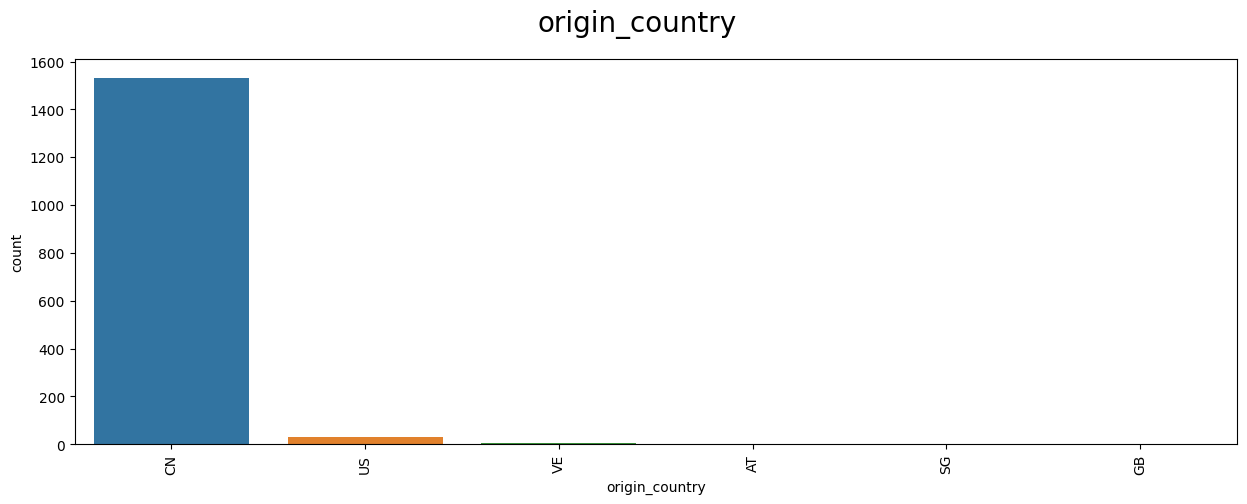

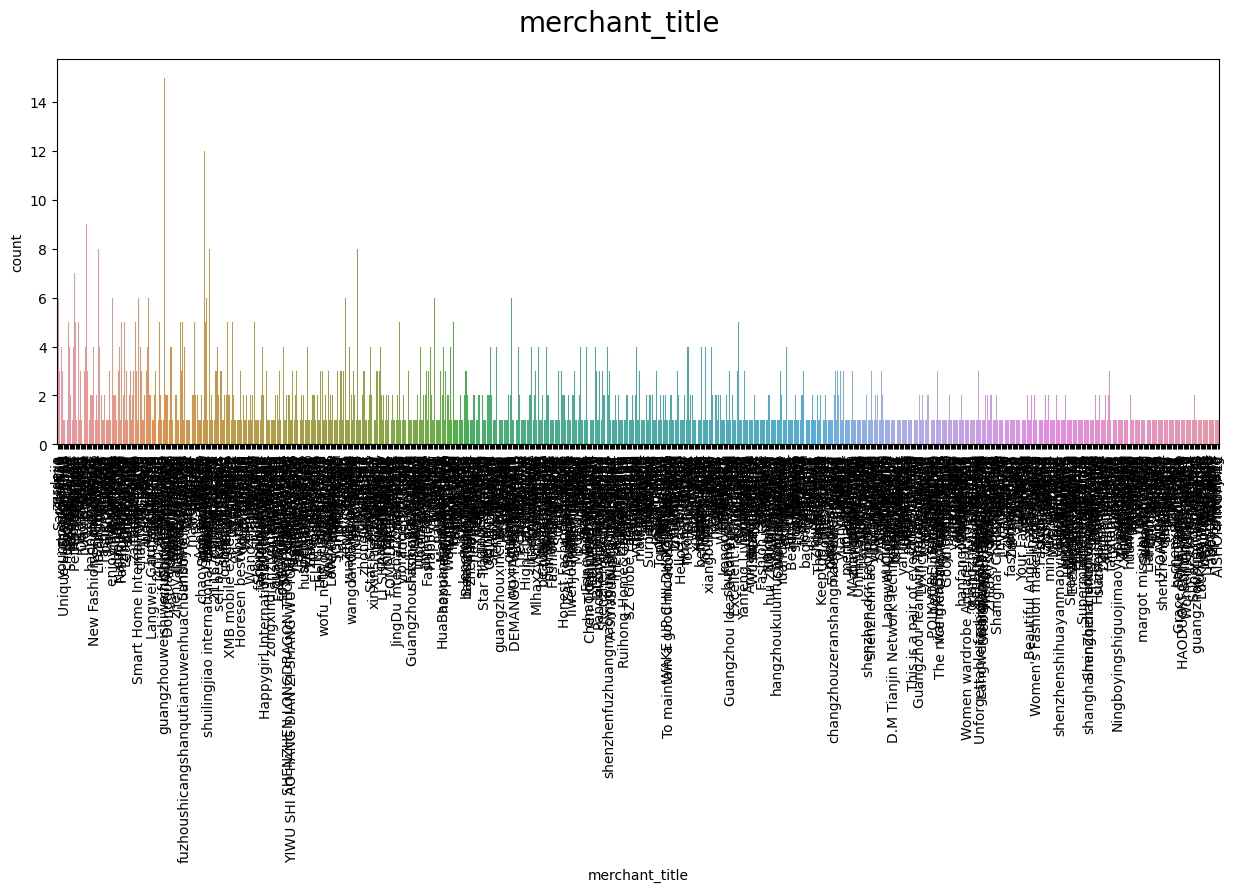

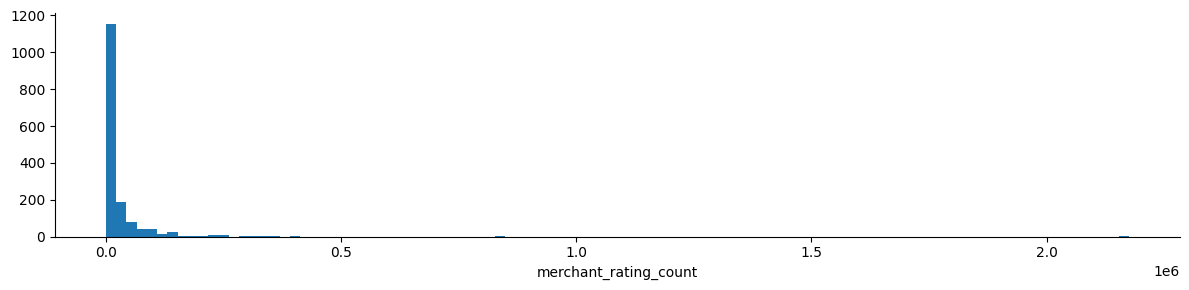

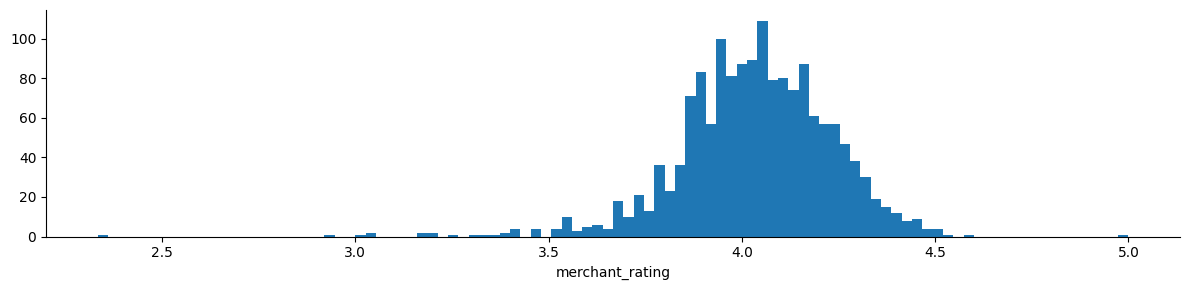

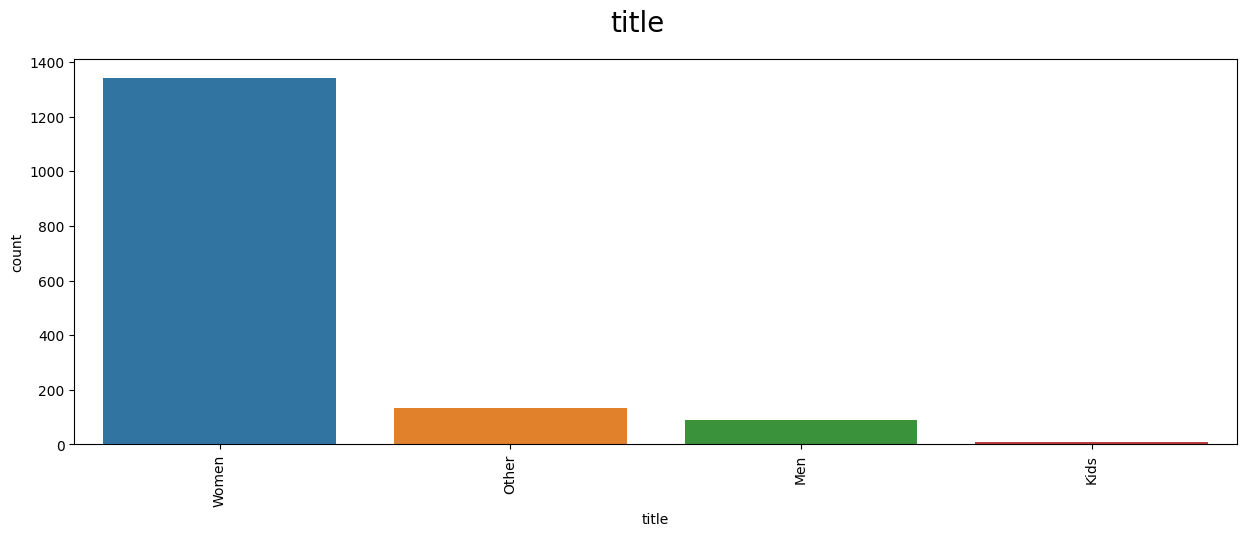

In [48]:
def histograms_and_countplots(column, df, columns_to_exclude):
  if column not in columns_to_exclude:
      if df[column].dtype not in ['int64', 'float64']:
            f, axes = plt.subplots(1,1,figsize=(15,5))
            sns.countplot(x=column, data = df)
            plt.xticks(rotation=90)
            plt.suptitle(column,fontsize=20)
            plt.show()
      else:
            g = sns.FacetGrid(df, margin_titles=True, aspect=4, height=3)
            g.map(plt.hist,column,bins=100)
            plt.show()
      plt.show()

columns_to_exclude = ['title_orig','tags', 'merchant_name', 'merchant_id']
for column in df.columns:
  histograms_and_countplots(column, df, columns_to_exclude)


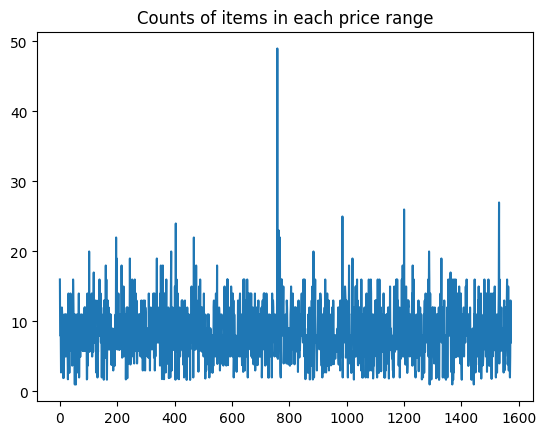

In [47]:
plt.plot(df['price'])
plt.title("Counts of items in each price range")
plt.show()



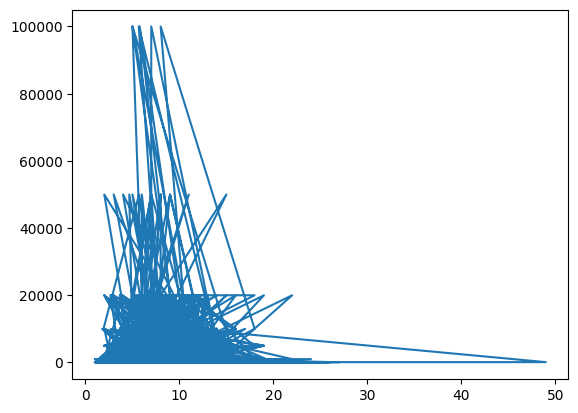

In [49]:
plt.plot(df['price'],df['units_sold'])
plt.show()


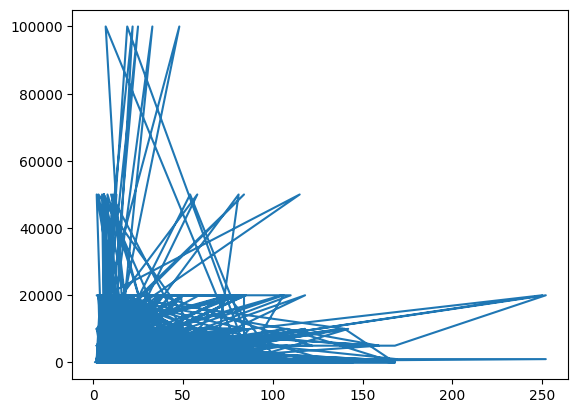

In [50]:
plt.plot(df['retail_price'],df['units_sold'])
plt.show()

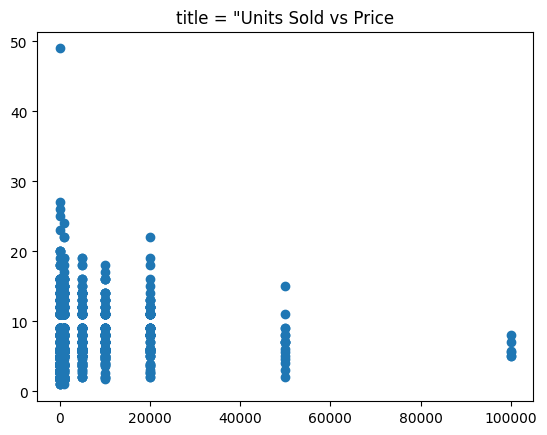

In [51]:
plt.scatter(df['units_sold'],df['price'])
plt.title('title = "Units Sold vs Price')
plt.show()


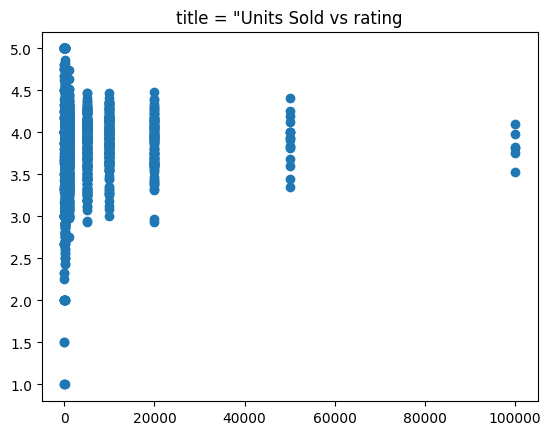

In [52]:
plt.scatter(df['units_sold'],df['rating'])
plt.title('title = "Units Sold vs rating')
plt.show()

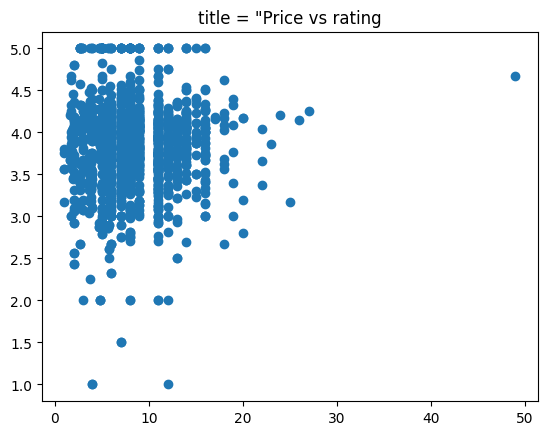

In [53]:
plt.scatter(df['price'],df['rating'])
plt.title('title = "Price vs rating')
plt.show()

In [54]:
round(df.corr(),2)


<ipython-input-54-0ca950f3f609>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr(),2)


,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating
price,1.00,0.30,-0.02,-0.07,0.05,-0.00,-0.00,0.00,-0.01,-0.01,...,0.07,0.01,0.09,0.27,0.87,0.15,-0.03,-0.17,-0.02,0.05
retail_price,0.30,1.00,0.01,-0.04,0.02,0.05,0.05,0.06,0.05,0.05,...,0.02,0.00,0.03,0.12,0.26,-0.01,0.04,-0.00,0.03,0.05
units_sold,-0.02,0.01,1.00,-0.02,0.04,0.90,0.87,0.89,0.89,0.86,...,-0.01,0.06,-0.00,0.13,-0.03,-0.01,-0.01,0.01,0.27,0.12
uses_ad_boosts,-0.07,-0.04,-0.02,1.00,-0.05,-0.04,-0.04,-0.04,-0.04,-0.04,...,0.06,0.00,0.04,-0.14,-0.06,-0.02,-0.02,0.04,0.03,-0.02
rating,0.05,0.02,0.04,-0.05,1.00,0.05,0.13,0.09,0.04,0.00,...,0.01,0.26,-0.01,0.03,0.07,0.02,0.05,-0.05,0.03,0.24
rating_count,-0.00,0.05,0.90,-0.04,0.05,1.00,0.98,0.99,0.98,0.94,...,-0.00,0.08,0.04,0.13,-0.01,-0.00,-0.00,0.01,0.26,0.14
rating_five_count,-0.00,0.05,0.87,-0.04,0.13,0.98,1.00,0.98,0.93,0.87,...,0.00,0.14,0.04,0.12,-0.00,0.01,-0.00,0.00,0.25,0.16
rating_four_count,0.00,0.06,0.89,-0.04,0.09,0.99,0.98,1.00,0.98,0.93,...,-0.01,0.08,0.04,0.13,-0.00,-0.01,-0.00,0.01,0.25,0.14
rating_three_count,-0.01,0.05,0.89,-0.04,0.04,0.98,0.93,0.98,1.00,0.98,...,-0.01,0.02,0.04,0.13,-0.02,-0.01,0.00,0.02,0.26,0.11
rating_two_count,-0.01,0.05,0.86,-0.04,0.00,0.94,0.87,0.93,0.98,1.00,...,-0.01,-0.02,0.05,0.13,-0.02,-0.01,-0.00,0.02,0.26,0.09


<ipython-input-55-f0d437027b14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df.corr(),2),annot=True)


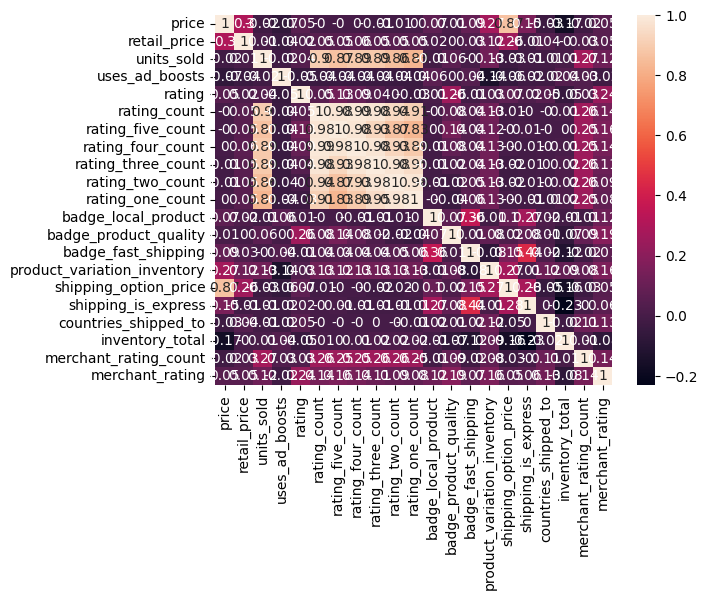

In [55]:
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()

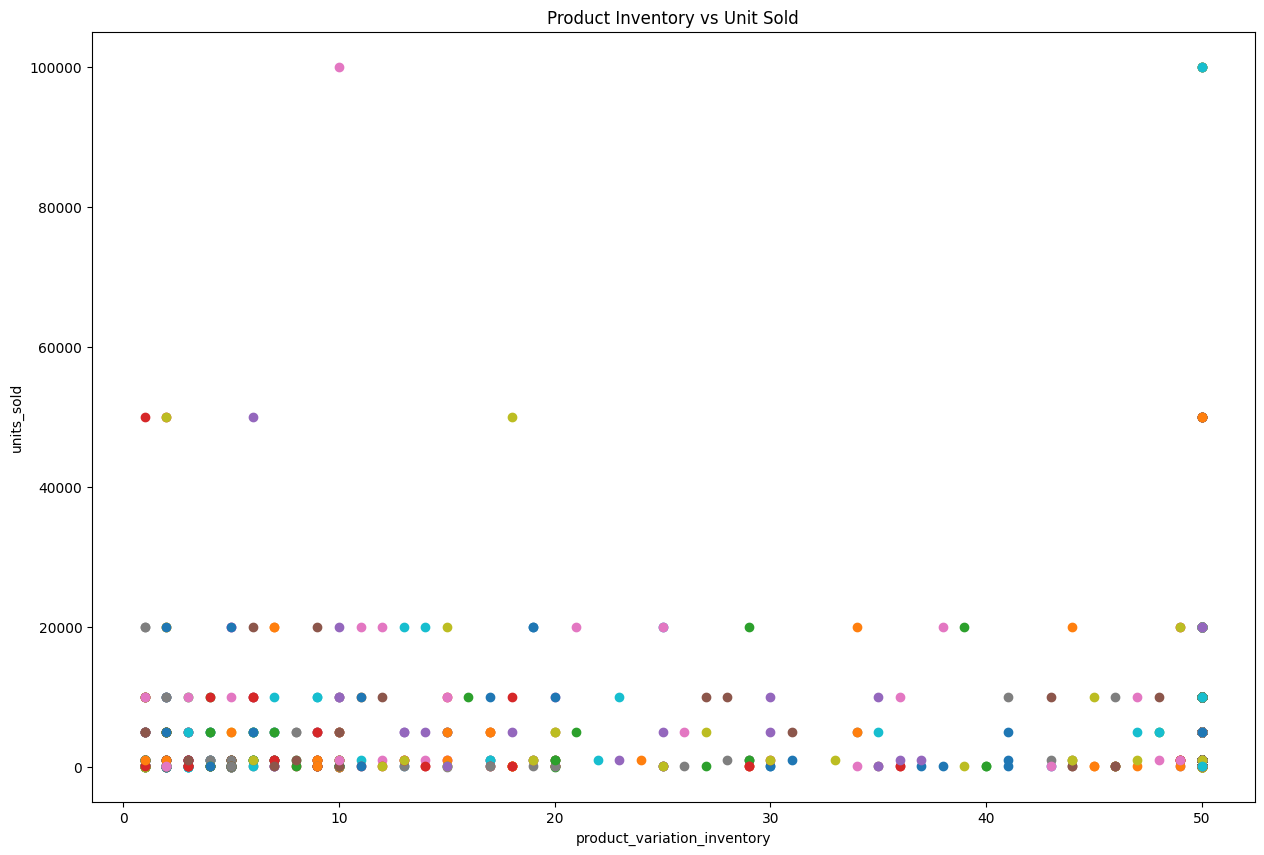

In [56]:
grouped_data=df.groupby('title_orig')
fig,ax=plt.subplots(figsize=(15,10))
for tags,group in grouped_data:
  ax.scatter(group['product_variation_inventory'],group['units_sold'],label='title_orig')
ax.set_xlabel('product_variation_inventory')
ax.set_ylabel('units_sold')
ax.set_title('Product Inventory vs Unit Sold')
plt.show()


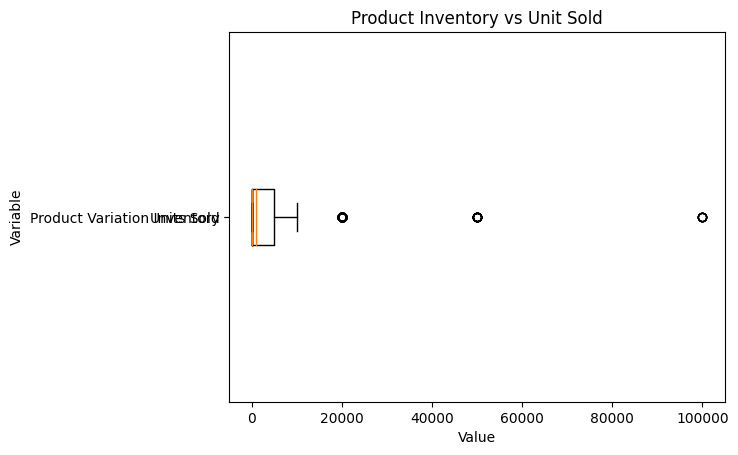

In [57]:
fig,ax=plt.subplots()
ax.boxplot(df['product_variation_inventory'],vert=False,labels=['Product Variation Inventory'])
ax.boxplot(df['units_sold'],vert=False,labels=['Units Sold'])

ax.set_xlabel('Value')
ax.set_ylabel('Variable')
ax.set_title('Product Inventory vs Unit Sold')
plt.show()

In [58]:
df['inventory_to_sales_ratio']=df['product_variation_inventory']/df['units_sold']
df['inventory_to_sales_ratio'].describe()


count    1573.000000
mean        0.264318
std         1.070271
min         0.000020
25%         0.005000
50%         0.030000
75%         0.140000
max        25.000000
Name: inventory_to_sales_ratio, dtype: float64

In [59]:
df['inventory_to_sales_ratio']

0       0.5000
1       0.0025
2       0.0100
3       0.0100
4       0.0100
         ...  
1568    0.0050
1569    0.0200
1570    0.1500
1571    0.3600
1572    0.5000
Name: inventory_to_sales_ratio, Length: 1573, dtype: float64

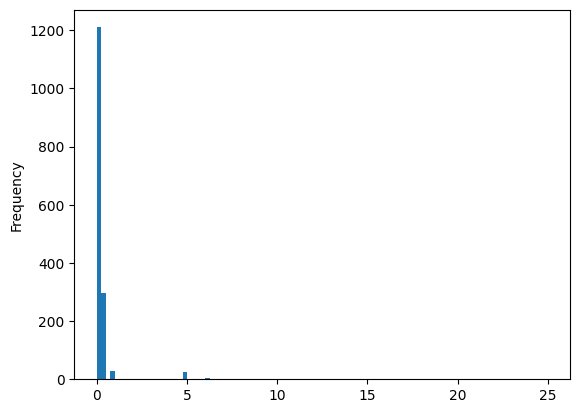

In [60]:
df['inventory_to_sales_ratio'].plot.hist(bins=100)
plt.show()


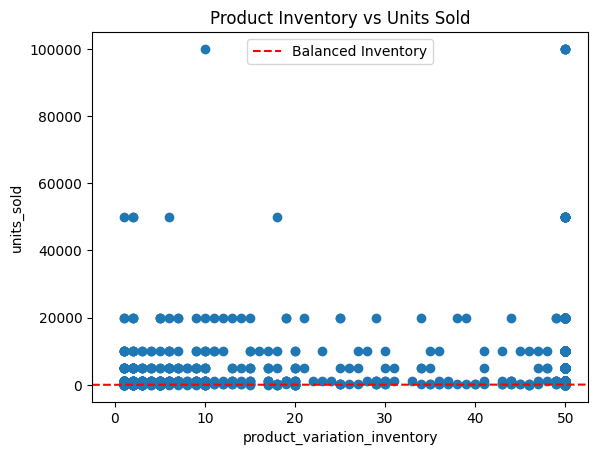

In [61]:
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots()
ax.scatter(df['product_variation_inventory'],df['units_sold'])
ax.set_xlabel('product_variation_inventory')
ax.set_ylabel('units_sold')
ax.set_title('Product Inventory vs Units Sold')
ax.axline((0,0),slope=1,color='red',linestyle='--',label='Balanced Inventory')
plt.legend()
plt.show()



In [62]:

#df['units_sold'] = df['units_sold'].apply(
#    lambda x: '100-1000' if x <= 100 else '1000-5000' if x == 1000 else '5000-10000' if x == 5000 else '10000-20000' \
#    if x == 10000 else '20000-50000' if x == 20000 else '50000-100000' if x == 50000 else '100000+')


df['units_sold'] = df['units_sold'].apply(lambda x: 100 if x <= 100 else x)

#df['units_sold'] = df['units_sold'].apply(
#    lambda x: 1 if x <= 100 else 2 if x == 1000 else 3 if x == 5000 else 4 \
#    if x == 10000 else 5 if x == 20000 else 6 if x == 50000 else 7)

df['gap_price'] = np.abs(round((df['price'] - df['retail_price']) / df['retail_price'] * 100, 1))
df['total_tags'] = df['tags'].apply(lambda x: len(x.split(',')))


#variable in order
sold_order = [100, 1000, 5000, 10000, 20000, 50000, 100000]
units_sold_order = ['100-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000',
                    '100000+']

#palette visualization
pal_list = ['#66ccff', '#0099cc', '#003399', '#ccffcc', '#b3b3d7', '#d1cab0', '#c3c3e5', '#b0cdd1']

In [63]:
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,inventory_total,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_id,title,inventory_to_sales_ratio,gap_price,total_tags
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,...,50,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,Women,0.5000,14.3,24
1,Women'S Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,50,CN,SaraHouse,17752,3.899673,56458aa03a698c35c9050988,Women,0.0025,63.6,15
2,2020 New Arrival Women Spring And Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,...,50,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,Women,0.0100,81.4,19
3,Hot Summer Cool T Shirt For Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,...,50,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,Women,0.0100,0.0,18
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,...,50,CN,youngpeopleshop,14482,4.001588,5ab3b592c3911a095ad5dadb,Women,0.0100,9.3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,...,50,CN,cxuelin99126,5316,4.224605,5b507899ab577736508a0782,Women,0.0050,33.3,24
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,...,50,CN,sell best quality goods,4435,3.696054,54d83b6b6b8a771e478558de,Women,0.0200,96.4,18
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,...,50,CN,shixueying,210,3.961905,5b42da1bf64320209fc8da69,Men,0.1500,73.7,12
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,...,50,CN,modai,31,3.774194,5d56b32c40defd78043d5af9,Women,0.3600,18.2,21


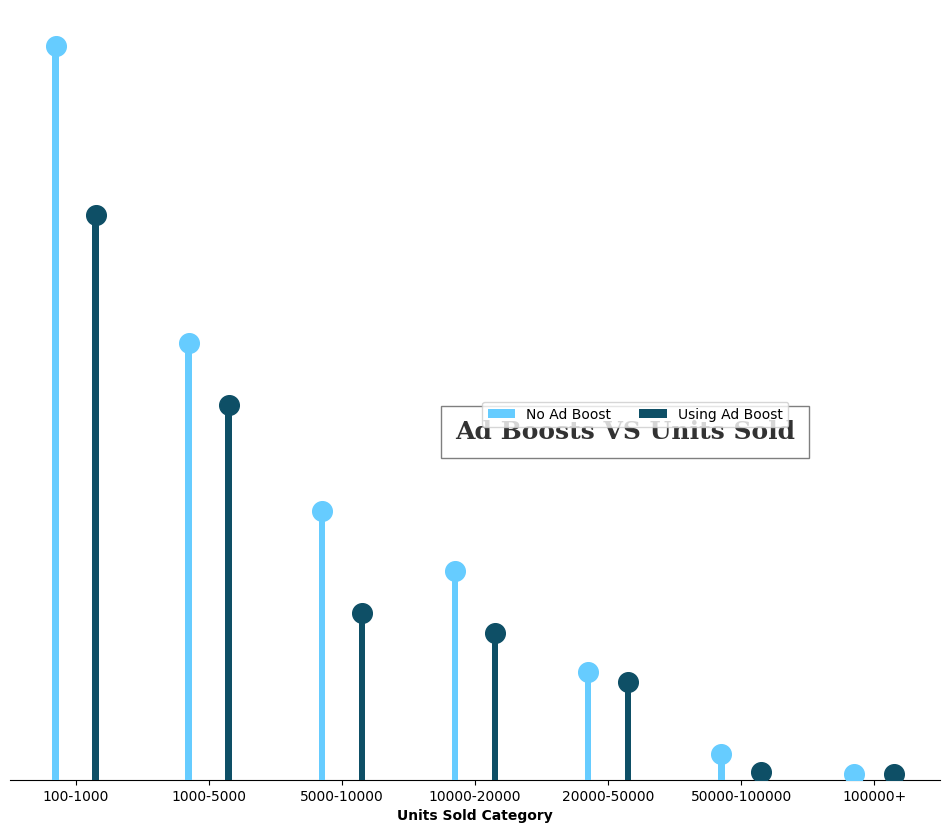

In [64]:

no_ad_boost = df[df['uses_ad_boosts'] == 0]
ad_boost = df[df['uses_ad_boosts'] == 1]


no_ad_sold = pd.DataFrame(no_ad_boost.groupby('units_sold')['uses_ad_boosts'].count())
ad_sold = pd.DataFrame(ad_boost.groupby('units_sold')['uses_ad_boosts'].sum())

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

ax.bar(np.arange(len(no_ad_sold.index)), height = no_ad_sold['uses_ad_boosts'], zorder = 3, color = '#66ccff', width = 0.05,
      label = 'No_ad_Boost')
ax.scatter(np.arange(len(no_ad_sold.index)), no_ad_sold['uses_ad_boosts'], zorder = 3, s = 200, color = '#66ccff')
ax.bar(np.arange(len(ad_sold.index))+0.3, height=ad_sold["uses_ad_boosts"], zorder=3, color="#0e4f66", width=0.05,
      label = 'Using Ad Boost')
ax.scatter(np.arange(len(ad_sold.index))+0.3, ad_sold["uses_ad_boosts"], zorder=3,s=200, color="#0e4f66")

ax.set_xticks(np.arange(len(no_ad_sold.index)) + 0.3 / 2)
ax.set_xticklabels(['100-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000', '100000+'])
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Units Sold Category', fontweight = 'bold')

legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No Ad Boost', 'Using Ad Boost'], ncol = 2, bbox_to_anchor = (0.5, 0.5))

ax.text(3, 170, 'Ad Boosts VS Units Sold', fontsize = 18, fontweight = 'bold', fontfamily = 'serif',
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

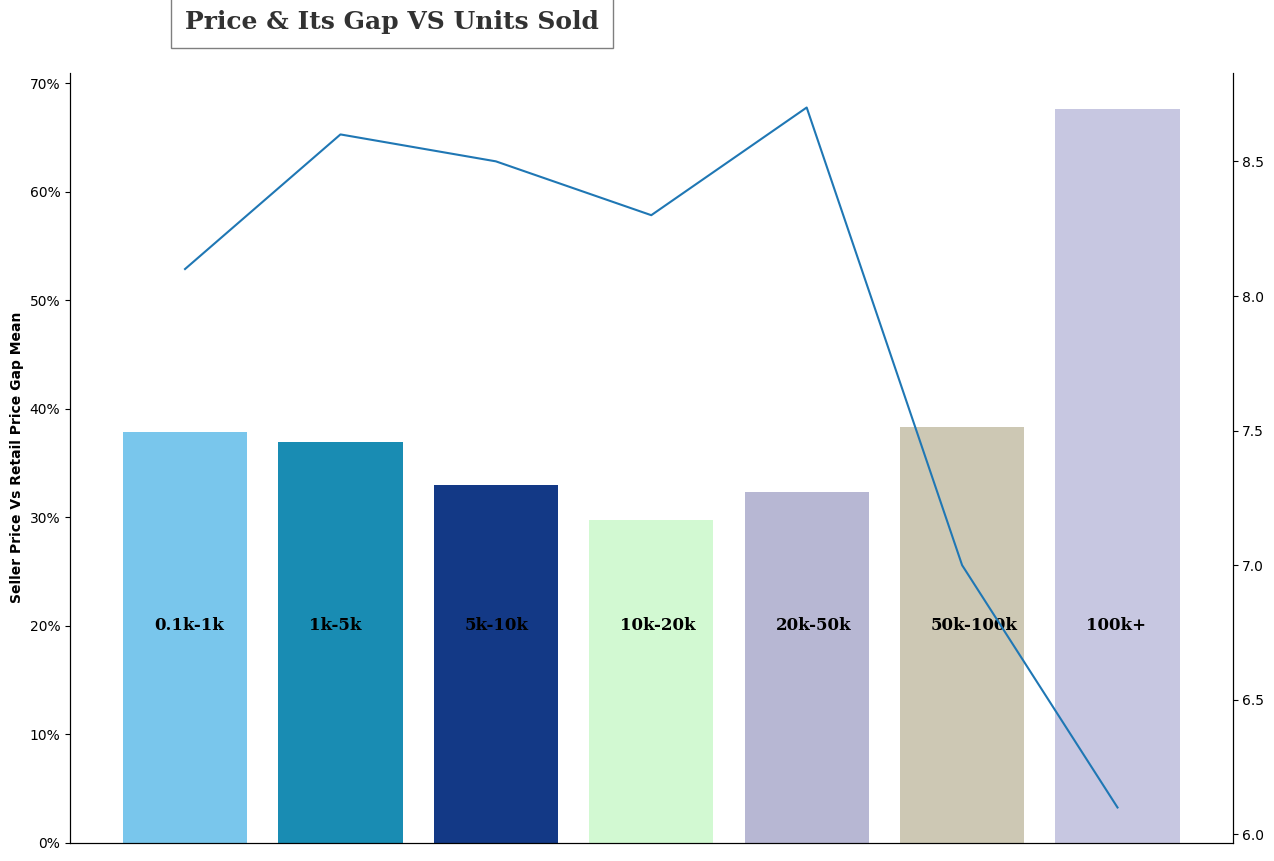

In [65]:


sold_pricegap = round(df.groupby('units_sold')['gap_price'].mean(), 1)
sold_price = round(df.groupby('units_sold')['price'].mean(), 1)

units_sold_orderk = ['0.1k-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']

fig, ax = plt.subplots(figsize = (15, 10))
sns.barplot(x = units_sold_orderk, y = sold_pricegap.values, palette = pal_list, ax = ax)

ax2 = ax.twinx()
ax2.plot(units_sold_orderk, sold_price.values)

for s in ['top']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

ax.set_xticklabels(units_sold_orderk)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Seller Price Vs Retail Price Gap Mean', fontweight = 'bold')
ax.set_xlabel('')
ax.set_xticks([])
ax.text(0, 75, 'Price & Its Gap VS Units Sold', fontsize = 18, fontweight = 'bold', fontfamily = 'serif',
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

for ind, val in enumerate(units_sold_orderk):
    ax.annotate(f'{val}', xy = (ind - 0.2, 20), va = 'center',
               fontsize = 12, fontweight = 'bold', fontfamily = 'serif', color = 'black')

plt.show()

In [66]:
#Product Variation Inventory VS Units Sold

xx = df[df['product_variation_inventory'] >= 25].loc[:, 'units_sold'].value_counts()
xq = df[df['product_variation_inventory'] < 25].loc[:, 'units_sold'].value_counts()


kk = pd.DataFrame({'Units_Sold': xx.index, '<25_count': xq.values, '>=25_count': xx.values})
kk['%<25'] = round(kk['<25_count'] / (kk['<25_count'] + kk['>=25_count']) * 100, 2)
kk['%>25'] = round(kk['>=25_count'] / (kk['<25_count'] + kk['>=25_count']) * 100, 2)

kk

,Units_Sold,<25_count,>=25_count,%<25,%>25
0,100,308,340,47.53,52.47
1,1000,139,266,34.32,65.68
2,5000,67,150,30.88,69.12
3,10000,35,142,19.77,80.23
4,20000,21,82,20.39,79.61
5,50000,5,12,29.41,70.59
6,100000,1,5,16.67,83.33


<Figure size 640x480 with 0 Axes>

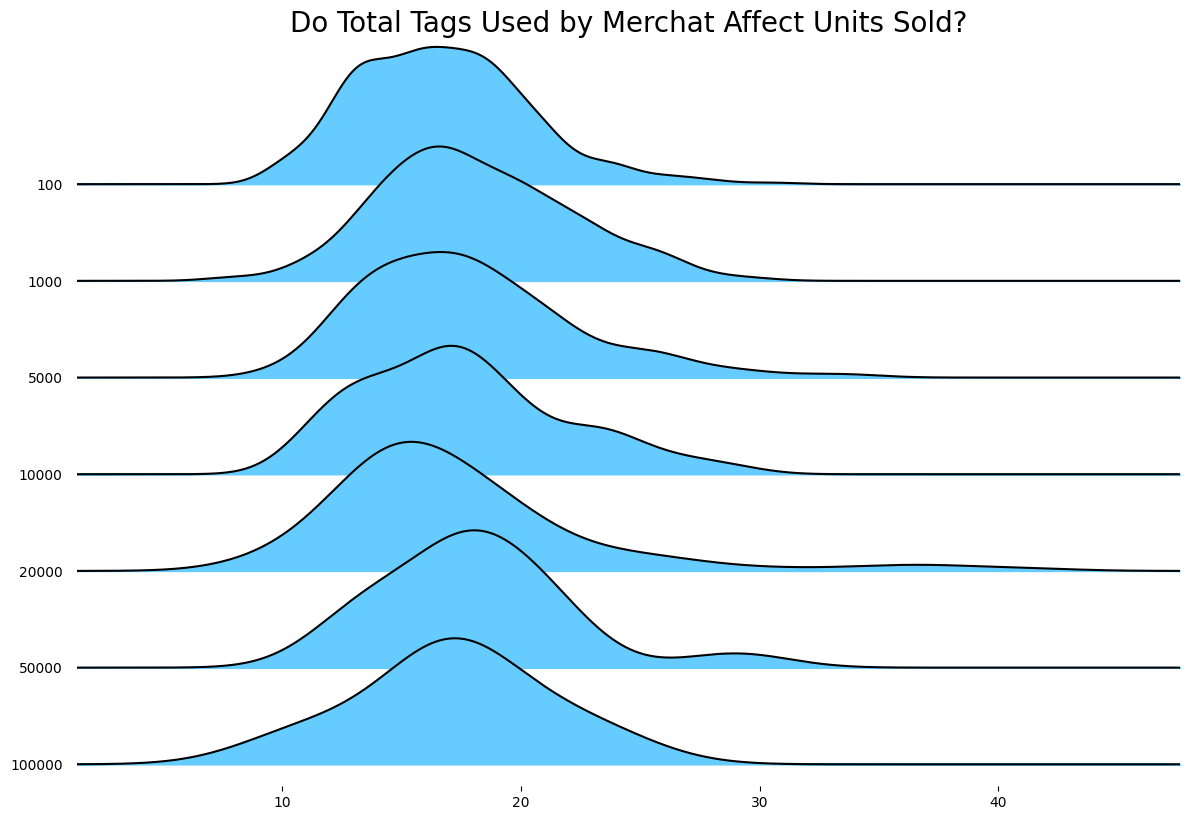

In [67]:
from joypy import joyplot

plt.figure()

joyplot(
    data=df[['units_sold', 'total_tags']],
    by='units_sold',
    color = '#66ccff',
    figsize=(12, 8)
)
plt.title('Do Total Tags Used by Merchat Affect Units Sold?', fontsize=20)
plt.show()

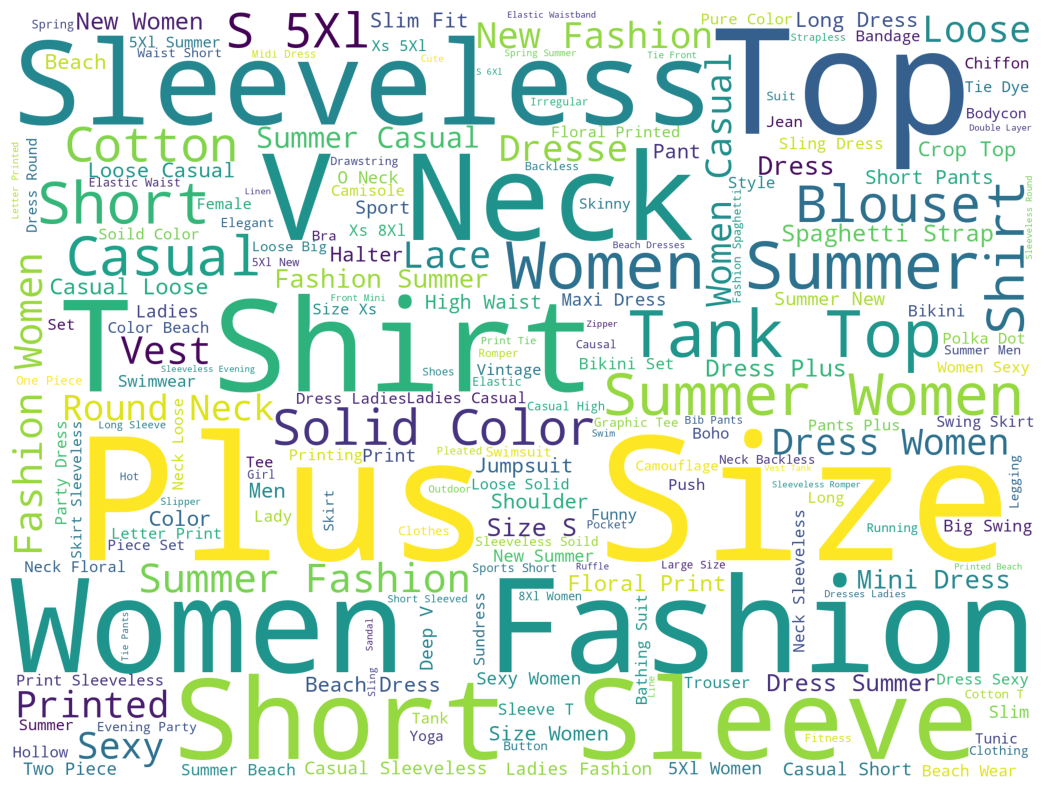

In [68]:
text = ' '.join(df['title_orig'])

plt.figure(figsize = (15, 10))

wordcloud2 = WordCloud(width = 2000, height = 1500,
            background_color ='white').generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [69]:
df.columns

Index(['title_orig', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_title',
       'merchant_rating_count', 'merchant_rating', 'merchant_id', 'title',
       'inventory_to_sales_ratio', 'gap_price', 'total_tags'],
      dtype='object')

In [70]:
df.drop(columns=['title_orig'], inplace=True)

In [71]:
df.drop(columns=['merchant_id'],axis = 1,inplace=True )

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1573 non-null   float64
 1   retail_price                 1573 non-null   int64  
 2   units_sold                   1573 non-null   int64  
 3   uses_ad_boosts               1573 non-null   int64  
 4   rating                       1573 non-null   float64
 5   rating_count                 1573 non-null   int64  
 6   rating_five_count            1573 non-null   float64
 7   rating_four_count            1573 non-null   float64
 8   rating_three_count           1573 non-null   float64
 9   rating_two_count             1573 non-null   float64
 10  rating_one_count             1573 non-null   float64
 11  badge_local_product          1573 non-null   int64  
 12  badge_product_quality        1573 non-null   int64  
 13  badge_fast_shippin

In [73]:
Cat_columns = df.select_dtypes(include=['object']).columns
Cat_columns


Index(['tags', 'product_color', 'product_variation_size_id',
       'shipping_option_name', 'origin_country', 'merchant_title', 'title'],
      dtype='object')

In [74]:
for i in Cat_columns:
  pd.get_dummies(df[i], prefix=i, drop_first=True)
  df = pd.concat([df, pd.get_dummies(df[i], prefix=i, drop_first=True)], axis=1)
  df.drop(columns=i, inplace=True)

df.head()


,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,merchant_title_zktrade.co.ltd,merchant_title_zongxindianziyouxian gongsi,merchant_title_zoufei,merchant_title_zoushoujintmiao,merchant_title_zufanqiudinli,merchant_title_zuilangmanDS,merchant_title_zzbllss,title_Men,title_Other,title_Women
0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,...,0,0,0,0,0,0,0,0,0,1
2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,...,0,0,0,0,0,0,0,0,0,1
4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
X=df.drop(columns=['units_sold'])
y=df['units_sold']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_pred, y_test)

0.9015873015873016

In [77]:
!pip install sklearn.ensemble
import sklearn.ensemble
!pip install gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.ensemble (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement gradient_boosting (from versions: none)
ERROR: No matching distribution found for gradient_boosting


In [79]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [80]:
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
gnb = GaussianNB()
svm = SVC()
knn = KNeighborsClassifier()
models = [logreg, logreg_cv, rf, gboost, gnb, svm, knn]
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.43642572566875354
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.7329286030481249
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8418326693227092
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.9419844431796622
****
Cross-validation of : <class 'sklearn.naive_bayes.GaussianNB'>
CV score = 0.7384968064250934
****
Cross-validation of : <class 'sklearn.svm._classes.SVC'>
CV score = 0.42607664579776133
****
Cross-validation of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
CV score = 0.638326060836021
****


In [81]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_pred, y_test)

0.9809523809523809